In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('celonis_calculator.csv')

In [3]:
data

,Revenue,COGS,SG&A,Free Cash Flow,Operating Margin,Revenue Protection,Company
0,5000.0,3500.0,950.0,35.3,26.0,7.5,Auto Generated
1,513983000.0,446343000.0,54129000.0,4200.0,3000.0,338.2,Amazon2022
2,46710000.0,25231000.0,14804000.0,283.5,216.2,107.4,Nike 2022
3,156735000.0,135754000.0,10667000.0,1300.0,907.3,104.9,General Motors 2022
4,94780000.0,51745000.0,25236000.0,578.6,439.7,215.2,Nestlé 2022
5,81462000.0,60609000.0,3946000.0,596.8,434.2,104.3,Tesla 2022
6,611289000.0,463721000.0,127140000.0,4500.0,3300.0,737.8,Walmart 2023
7,109120000.0,82229000.0,20658000.0,805.9,588.7,134.5,Target Corporation 2023
8,32250300.0,23879200.0,2032000.0,235.6,171.6,41.9,Starbucks Corporation 2022
9,82722000.0,54401000.0,16388000.0,562.0,416.9,141.6,The Walt Disney Company 2022


In [4]:
data.rename(columns={"Free Cash Flow ": "Free_cash_flow","Operating Margin":"Operating_Margin",
                     "Revenue Protection": "Revenue_Protection"} , inplace =True)

In [5]:
data.corr()

,Revenue,COGS,SG&A,Free_cash_flow,Operating_Margin,Revenue_Protection
Revenue,1.000000,0.974776,0.914481,0.989195,0.992987,0.753335
COGS,0.974776,1.000000,0.851819,0.996778,0.994072,0.588168
SG&A,0.914481,0.851819,1.000000,0.873968,0.886793,0.805621
Free_cash_flow,0.989195,0.996778,0.873968,1.000000,0.999349,0.649917
Operating_Margin,0.992987,0.994072,0.886793,0.999349,1.000000,0.670549
Revenue_Protection,0.753335,0.588168,0.805621,0.649917,0.670549,1.000000


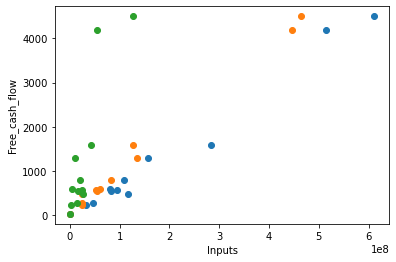

In [6]:

plt.scatter(data["Revenue"], data["Free_cash_flow"],label='Revenue')
plt.scatter(data["COGS"], data["Free_cash_flow"])
plt.scatter(data["SG&A"], data["Free_cash_flow"])
plt.xlabel("Inputs")
plt.ylabel("Free_cash_flow")

plt.show()

<AxesSubplot:xlabel='SG&A', ylabel='Free_cash_flow'>

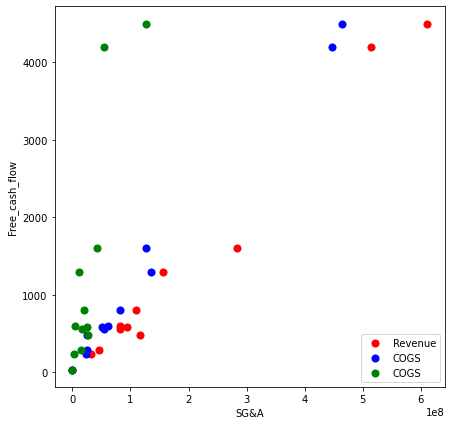

In [7]:
ax = data.plot(kind='scatter', x='Revenue', y='Free_cash_flow',color ="Red", label='Revenue',s =50,figsize=(7,7))
data.plot(kind='scatter', x='COGS', y='Free_cash_flow', color = "Blue", label='COGS',s =50, ax=ax)
data.plot(kind='scatter', x='SG&A', y='Free_cash_flow', color = "Green", label='COGS',s=50, ax=ax)

In [8]:
data.columns

Index(['Revenue', 'COGS', 'SG&A', 'Free_cash_flow', 'Operating_Margin',
       'Revenue_Protection', 'Company '],
      dtype='object')

# Equation for Free Cash Flow

In [9]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
X = data[['Revenue','COGS','SG&A']]
y = data['Free_cash_flow']

In [10]:
linreg.fit(X,y)     #Fit

LinearRegression()

In [11]:
print((linreg.intercept_).round(2))
print((linreg.coef_).round(2))

6.17
[ 0.  0. -0.]


In [12]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='y ~ X', data= data).fit()
lm.summary()
print(lm.pvalues)

Intercept    3.646402e-01
X[0]         2.255458e-08
X[1]         1.104463e-10
X[2]         2.241708e-03
dtype: float64


C:\Users\jsaum\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [13]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

lm = LinearRegression()
#We train based on Training Data BUT will Test on Test Set
Model_train = lm.fit(X_train,y_train)
y_pred = Model_train.predict(X_test)
print(Model_train.coef_)
print(Model_train.intercept_)

[ 3.22396759e-06  5.93878934e-06 -1.85474097e-06]
10.166962237590269


In [14]:
accuracy = Model_train.score(X_test,y_test)

In [15]:
print(accuracy)

0.9998864149865113


In [18]:
print("Free_Cash_Flow =",  Model_train.intercept_ ,"+", round(Model_train.coef_[0],4), "*Revenue +",  Model_train.coef_[1],"*COGS +",
        Model_train.coef_[2],"*SG&A")

Free_Cash_Flow = 10.166962237590269 + 0.0 *Revenue + 5.938789338361714e-06 *COGS + -1.8547409672368409e-06 *SG&A
